In [126]:
class Kmeans:
    
    def __init__(self, parameter, num_of_clusters):
        self.parameter = parameter
        self.num_of_clusters = num_of_clusters
        
    def train(self, data, num_of_iters):
        shape = data.shape
        centers = np.array([np.zeros(shape[0]) for i in range (0, self.num_of_clusters)]).T
        if self.parameter == "random":
            centers = np.array([np.random.sample((shape[1], 1)) for i in range (0, self.num_of_clusters)])
        labels = np.array([np.zeros(shape[0])]).T
        labeled_data = np.hstack((data, labels))
        for iter_ in range(0, num_of_iters):
            for i in range(0, shape[0]):
                min_dist = np.linalg.norm(data[i] - centers[0])
                argmin = 0
                for j in range(0, centers.shape[0]):
                    cur_dist = np.linalg.norm(data[i] - centers[j])
                    if cur_dist < min_dist:
                        min_dist = cur_dist
                        argmin = j
                labeled_data[i][-1] = argmin
            for j in range(0, centers.shape[0]):
                num_of_labeled = 0
                sum = np.array([np.zeros(shape[1])])
                for i in range(0, shape[0]):
                    if labeled_data[i][-1] == j:
                        sum[0] += data[i]
                        num_of_labeled += 1
                sum[0] /= num_of_labeled
                centers[j] = sum.T
        return [labeled_data, centers]

In [127]:
n_elems = 50
data = np.random.sample((2, n_elems))
for i in range(0, n_elems):
    if data[1][i] > 0.5 and data[0][i] < 0.5:
        data[0][i] = (1 - data[0][i])
    elif data[1][i] < 0.5 and data[0][i] > 0.5:
        data[0][i] = (1 - data[0][i]) - (1 - data[0][i])*(1 - data[0][i])
data = data.transpose()

In [128]:
kmeans = Kmeans("random", 2)

In [129]:
res_tuple = kmeans.train(data, 2)
labeled_data = res_tuple[0]
centers = res_tuple[1]

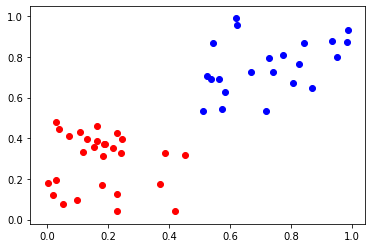

In [130]:
fig, ax = plt.subplots()
colors = [[1.0, 0.0, 0.0], [0.0, 0.0, 1.0]]
for i in range(0, 2):
    cluster = np.array([np.zeros(2)]).T
    for j in range(0, data.shape[0]):
        if labeled_data[j][-1] == i:
            cluster = np.hstack((cluster, np.array([data[j]]).T))
    ax.scatter(cluster[0][1:], cluster[1][1:], color = colors[i])